## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [24]:
#1 Import the dataset (Housing.csv) and look at the top five rows
import pandas as pd
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [14]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [15]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [16]:
#4 Check for missing  values if any, replace with appropriate values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [17]:
#5 Prepare  X (independent variables) and y (dependent variable)
x=df.drop(columns=['price'])
y=df['price']

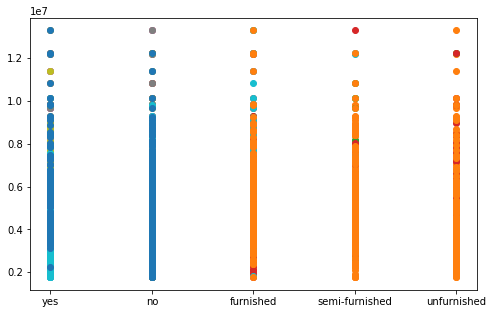

In [18]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
import matplotlib.pyplot as plt
import seaborn as sns

x=df.drop(columns=['price'])
y=df['price']

plt.figure(figsize=(8,5))
for i,col in enumerate(x.columns,1):
    #plt.subplots(2,i)
    plt.scatter(x[col],y)
plt.show()

In [19]:
#7 Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder
x=df.drop(columns=['furnishingstatus'])
y=df['furnishingstatus']
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 2,
       0, 0, 0, 0, 1, 1, 2, 1, 2, 1, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 1,
       0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 2, 1,
       2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1,
       1, 2, 0, 0, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 2, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 0, 1, 2,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1,

In [20]:
#8  Avoiding the Dummy Variable Trap

In [45]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler
models=StandardScaler()
numerical_cols=['price','area','bedrooms','bathrooms','stories','parking']
#numeric_col=pd.to_numeric(numerical_cols,errors='coerce')
models.fit_transform(x[numerical_cols])


array([[ 4.56636513,  1.04672629,  1.40341936,  1.42181174,  1.37821692,
         1.51769249],
       [ 4.00448405,  1.75700953,  1.40341936,  5.40580863,  2.53202371,
         2.67940935],
       [ 4.00448405,  2.21823241,  0.04727831,  1.42181174,  0.22441013,
         1.51769249],
       ...,
       [-1.61432675, -0.70592066, -1.30886273, -0.57018671, -0.92939666,
        -0.80574124],
       [-1.61432675, -1.03338891,  0.04727831, -0.57018671, -0.92939666,
        -0.80574124],
       [-1.61432675, -0.5998394 ,  0.04727831, -0.57018671,  0.22441013,
        -0.80574124]])

In [46]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
x=df.drop(columns=['furnishingstatus'])
y=df['furnishingstatus']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)

(381, 12)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
#df = pd.read_csv('/mnt/data/Housing.csv')

# Separate features and target
X = df.drop(columns=['furnishingstatus'])
y = df['furnishingstatus']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Encode categorical columns in X
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_pred=model.predict(x_train)
e=y_pred-y_train
print(e)

[-0.48011391 -0.57786435 -0.49412876 -0.57368873  0.27018869  0.3105713
  0.11183898 -0.05570949 -0.68167588  0.30401771  0.53830802  1.49175114
  0.88754703  0.49043606  0.07352914 -0.71311629 -0.64991866  0.88788008
 -0.55956481 -1.11524425 -0.96233863  0.13627424  1.31045199 -0.06872902
 -0.54575762 -0.92324555 -1.22579423 -0.87092669  0.40638724 -0.47130968
 -0.41332526  0.01009483 -1.02191978 -0.27352987  0.02989764 -0.27495141
 -1.27304072  0.00672285 -0.25496563 -1.01588797  0.13420455 -0.96938049
  0.21752428 -0.53112993 -0.17199322  0.71906003 -0.20953583 -0.4385079
  0.25298896  1.26788126 -0.58710916 -0.65709176 -0.75838073 -0.85569988
 -1.43082757 -0.70211591  0.29085893  0.15878856  0.10043752  0.18701232
  0.55676433 -0.70508282  1.0905302  -0.019445    0.42303903  0.77606369
  1.35022512 -0.62043539 -0.58816791 -0.69453317 -0.69446503 -0.02808625
  0.95107736 -1.20823968  0.14044817  0.25622349  0.05202923 -0.00841831
 -0.51758822  0.41993249  1.24616229  0.46064804  0.1

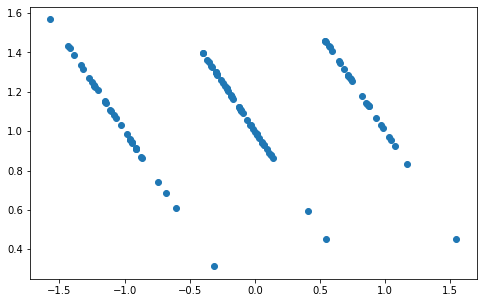

In [48]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
y_pred=model.predict(x_test)
residuals=y_test-y_pred
plt.figure(figsize=(8,5))
plt.scatter(residuals,y_pred)
plt.show()

In [49]:
#14  Predic on the test set
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
#df = pd.read_csv('/mnt/data/Housing.csv')

# Separate features and target
X = df.drop(columns=['furnishingstatus'])
y = df['furnishingstatus']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Encode categorical columns in X
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

y_pred=model.predict(x_test)
y_pred[:5]

array([1.10328997, 0.90820044, 1.12301795, 0.98320647, 1.40840489])

In [42]:
#15 Residual plot - plot y_pred in x axis and errors in y axis

#residual=y_test-y_pred


In [43]:
#16 Print Mean Squared Error and R Squared Value
import numpy as np
mse=np.mean((y_test-y_pred)**2)
numerator=np.sum((y_test-y_pred)**2)
denominator=np.sum(y_test-np.mean(y_test)**2)
r2=1-numerator/denominator
print(mse,r2)

0.5817024160788753 -10.183181885814085


In [44]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of a
k=len(x.columns)
n=len(y_test)
for i in range(k,1,-1):
    Adj_r2=1-(((1-r2)*(n-1))/(n-i-1))
    print(Adj_r2)

-11.581079621540844
-11.451377769772382
-11.324322894570622
-11.199834784524455
-11.077836436679211
-10.958253897702189
-10.841016114391383
-10.726054792892437
-10.613304266037703
-10.502701368265916
-10.394185317621897
